In [4]:
import pandas as pd
data = pd.read_csv("C:/Users/ASUS/Downloads/HAM10000_metadata.csv")
print(data.head(5))

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


| Code  | Meaning                                 |
| ----- | --------------------------------------- |
| nv    | Melanocytic Nevus (Mole, mostly benign) |
| mel   | Melanoma (Dangerous skin cancer)        |
| bkl   | Benign Keratosis                        |
| bcc   | Basal Cell Carcinoma                    |
| akiec | Actinic Keratoses                       |
| df    | Dermatofibroma                          |
| vasc  | Vascular lesion                         |


In [6]:
print("Total Samples:", len(data))
print("\nClass Distribution:")
print(data['dx'].value_counts())
#print(data['sex'].value_counts())

Total Samples: 10015

Class Distribution:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64


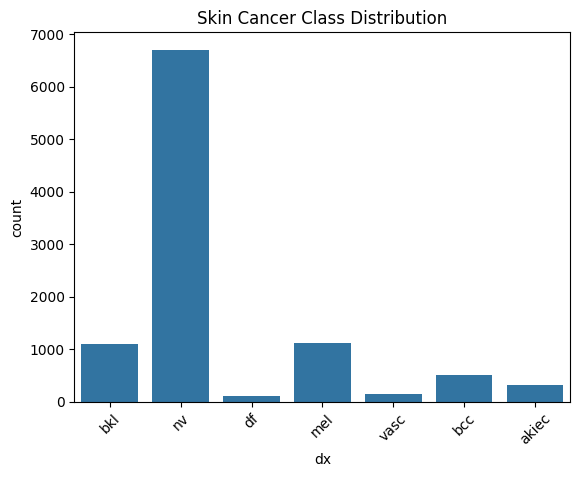

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='dx', data=data)
plt.title("Skin Cancer Class Distribution")
plt.xticks(rotation=45)
plt.show()

 Image not found: C:/Users/ASUS/Downloads/HAM10000_images_part_1/ISIC_0030731.jpg
 Image not found: C:/Users/ASUS/Downloads/HAM10000_images_part_1/ISIC_0030467.jpg


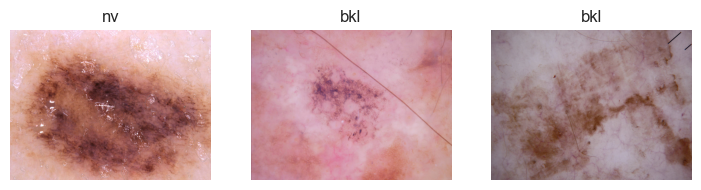

In [15]:
#Show Sample Image
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

data = pd.read_csv("C:/Users/ASUS/Downloads/HAM10000_metadata.csv")

image_folder = "C:/Users/ASUS/Downloads/HAM10000_images_part_1/"

sample = data.sample(5)

plt.figure(figsize=(15,5))

for i, row in enumerate(sample.itertuples()):


    img_path = os.path.join(image_folder, row.image_id + ".jpg")


    img = cv2.imread(img_path)

    if img is None:
        print(" Image not found:", img_path)
        continue


    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(row.dx)  # cancer type
    plt.axis("off")

plt.show()

In [19]:

data['label'] = data['dx'].apply(lambda x: 1 if x == 'mel' else 0)
print(data[['dx','label']].head(1000))


      dx  label
0    bkl      0
1    bkl      0
2    bkl      0
3    bkl      0
4    bkl      0
..   ...    ...
995  bkl      0
996  bkl      0
997  bkl      0
998  bkl      0
999  bkl      0

[1000 rows x 2 columns]


In [53]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (4000, 140, 140, 3)
Testing shape: (1000, 140, 140, 3)
